**The dataset is taken from Kaggle and can be accessed from the link below**
https://www.kaggle.com/datasets/kartik2112/fraud-detection

**About the Dataset**

This is a simulated credit card transaction dataset containing legitimate and fraud transactions from the duration 1st Jan 2019 - 31st Dec 2020. It covers credit cards of 1000 customers doing transactions with a pool of 800 merchants.

**Source of Simulation**

This was generated using Sparkov Data Generation | Github tool created by Brandon Harris. This simulation was run for the duration - 1 Jan 2019 to 31 Dec 2020. The files were combined and converted into a standard format

#### Details of the dataset

In [1]:
#Import the basic libraries

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# Load the dataset-train 

df_train = pd.read_csv('fraudTrain.csv')
df_train.drop(df_train.columns[0], axis=1, inplace=True)
df_train.sample(2)

,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,city,...,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
893225,2019-12-24 22:31:02,36485887555770,fraud_Hermann and Sons,shopping_pos,172.34,Michael,Gross,M,230 Ryan Tunnel Apt. 025,Fulton,...,40.4971,-82.8342,267,Facilities manager,2005-01-29,9158aee476a0855e65b38da5376eabb6,1356388262,40.93994,-82.532471,0
70399,2019-02-11 10:57:52,3527063666782582,"fraud_Goldner, Kovacek and Abbott",grocery_pos,111.92,Amanda,Alexander,F,21810 James Mall,Camden,...,30.9000,-94.7547,99,Colour technologist,1965-11-21,f8bb132ff72e5da4b5eb890c4953cfce,1328957872,30.53204,-94.812442,0


In [3]:
# Load the dataset-test 

df_test = pd.read_csv('fraudTest.csv')
df_test.drop(df_test.columns[0], axis=1, inplace=True)
df_test.sample(2)

,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,city,...,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
445407,2020-12-07 16:03:57,4629451965224809,fraud_Volkman PLC,food_dining,39.20,Karen,Warren,F,4900 Curtis Gardens Suite 952,Hahira,...,30.9416,-83.3574,10295,"Teacher, special educational needs",1997-12-26,8cbafe9af6530fd0f034ffc61c2a65cd,1386432237,31.592381,-82.588113,0
390389,2020-11-21 13:12:59,6011724471098086,"fraud_Kihn, Abernathy and Douglas",shopping_net,51.46,Ann,Lawson,F,144 Evans Islands Apt. 683,Burbank,...,46.1966,-118.9017,3684,Musician,1981-11-29,a472e78531dd2c78ade9c1ac34366bfc,1385039579,46.575694,-119.250340,0


In [4]:
#Check the dataset shape for both train and test

print('Shape of train dataset is {}'.format(df_train.shape))
print('Shape of test dataset is {}'.format(df_test.shape))

Shape of train dataset is (1296675, 22)
Shape of test dataset is (555719, 22)


We will explore the test dataset at later stage.

In [5]:
# Lets check the details of the df
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1296675 entries, 0 to 1296674
Data columns (total 22 columns):
 #   Column                 Non-Null Count    Dtype  
---  ------                 --------------    -----  
 0   trans_date_trans_time  1296675 non-null  object 
 1   cc_num                 1296675 non-null  int64  
 2   merchant               1296675 non-null  object 
 3   category               1296675 non-null  object 
 4   amt                    1296675 non-null  float64
 5   first                  1296675 non-null  object 
 6   last                   1296675 non-null  object 
 7   gender                 1296675 non-null  object 
 8   street                 1296675 non-null  object 
 9   city                   1296675 non-null  object 
 10  state                  1296675 non-null  object 
 11  zip                    1296675 non-null  int64  
 12  lat                    1296675 non-null  float64
 13  long                   1296675 non-null  float64
 14  city_pop          

**Observation:**

    1. There are 1,296,675 rows and 22 columns in the dataset with mixed data types of float64, int64 and object.
    2. We can rename a few columns for easier understanding.
    3. We will convert 'trans_date_trans_time' from object to datetime format.
    4. We will convert data type of  few other columns('cc_num','dob', 'unix_time')

#### Rename columns

In [6]:
df_train.columns

Index(['trans_date_trans_time', 'cc_num', 'merchant', 'category', 'amt',
       'first', 'last', 'gender', 'street', 'city', 'state', 'zip', 'lat',
       'long', 'city_pop', 'job', 'dob', 'trans_num', 'unix_time', 'merch_lat',
       'merch_long', 'is_fraud'],
      dtype='object')

In [7]:
df_train.rename(columns={'trans_date_trans_time':'transaction_time', 
                         "cc_num":"credit_card_no", "amt":"amount(usd)", 
                         "trans_num":"transaction_id"}, 
                inplace = True)

#### Convert data type

In [8]:
# to datetime format & from unix_time to datetime format

from datetime import datetime,date

df_train['transaction_time'] = pd.to_datetime(df_train['transaction_time'],infer_datetime_format=True)
#converting from epoch time
df_train['time'] = df_train['unix_time'].apply(datetime.utcfromtimestamp)
#df_train.drop('unix_time',axis=1, inplace = True)

*Unix time (also known as Epoch time, Posix time, seconds since the Epoch, or UNIX Epoch time) is a system for describing a point in time. It is the number of seconds that have elapsed since the Unix epoch, excluding leap seconds. The Unix epoch is 00:00:00 UTC on 1 January 1970 (an arbitrary date).*

#### Create new columns: 'Age' from Dob & hourly_basis

In [9]:
# create new column on hourly basis
df_train['hourly_basis'] = df_train['time'].dt.hour


# change to datetime
df_train['dob'] = pd.to_datetime(df_train['dob'])

# change the format to MM-DD-YYYY
df_train['dob'] = df_train['dob'].dt.strftime('%m-%d-%Y')

# This function converts given date to age

def age(born):
    born = datetime.strptime(born, '%m-%d-%Y').date()
    today = date.today()
    return today.year - born.year - ((today.month, 
                                      today.day) < (born.month, 
                                                    born.day))
   
df_train['Age'] = df_train['dob'].apply(age)

In [10]:
# Lets check int64 data type
df_train.select_dtypes(include='int64')

,credit_card_no,zip,city_pop,unix_time,is_fraud,hourly_basis,Age
0,2703186189652095,28654,3495,1325376018,0,0,34
1,630423337322,99160,149,1325376044,0,0,44
2,38859492057661,83252,4154,1325376051,0,0,60
3,3534093764340240,59632,1939,1325376076,0,0,55
4,375534208663984,24433,99,1325376186,0,0,36
...,...,...,...,...,...,...,...
1296670,30263540414123,84735,258,1371816728,0,12,60
1296671,6011149206456997,21790,100,1371816739,0,12,42
1296672,3514865930894695,88325,899,1371816752,0,12,55
1296673,2720012583106919,57756,1126,1371816816,0,12,42


In [11]:
df_train['credit_card_no'] = df_train['credit_card_no'].astype('category')

In [12]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1296675 entries, 0 to 1296674
Data columns (total 25 columns):
 #   Column            Non-Null Count    Dtype         
---  ------            --------------    -----         
 0   transaction_time  1296675 non-null  datetime64[ns]
 1   credit_card_no    1296675 non-null  category      
 2   merchant          1296675 non-null  object        
 3   category          1296675 non-null  object        
 4   amount(usd)       1296675 non-null  float64       
 5   first             1296675 non-null  object        
 6   last              1296675 non-null  object        
 7   gender            1296675 non-null  object        
 8   street            1296675 non-null  object        
 9   city              1296675 non-null  object        
 10  state             1296675 non-null  object        
 11  zip               1296675 non-null  int64         
 12  lat               1296675 non-null  float64       
 13  long              1296675 non-null  float6

In [14]:
round(df_train.describe().T.drop('count', axis=1), 3)

,mean,std,min,25%,50%,75%,max
amount(usd),70.351,160.316,1.000,9.650,47.520,83.140,28948.900
zip,48800.671,26893.222,1257.000,26237.000,48174.000,72042.000,99783.000
lat,38.538,5.076,20.027,34.620,39.354,41.940,66.693
long,-90.226,13.759,-165.672,-96.798,-87.477,-80.158,-67.950
city_pop,88824.441,301956.361,23.000,743.000,2456.000,20328.000,2906700.000
...,...,...,...,...,...,...,...
merch_lat,38.537,5.110,19.028,34.734,39.366,41.957,67.510
merch_long,-90.226,13.771,-166.671,-96.897,-87.438,-80.237,-66.951
is_fraud,0.006,0.076,0.000,0.000,0.000,0.000,1.000
hourly_basis,12.805,6.818,0.000,7.000,14.000,19.000,23.000


**Observations:**

    1. Min amount of transaction is 70.351(USD) and max is 28,948(USD).
    2. Population in each city ranges from 88,824.441 to 2,906,000.00
    3. 12.8 transactions happen on average per hour, 6.8 being the min and 23 being the max (on hourly basis)

In [15]:
df_train.describe(include='object').drop('count', axis=0)

,merchant,category,first,last,gender,street,city,state,job,dob,transaction_id
unique,693,14,352,481,2,983,894,51,494,968,1296675
top,fraud_Kilback LLC,gas_transport,Christopher,Smith,F,0069 Robin Brooks Apt. 695,Birmingham,TX,Film/video editor,03-23-1977,0b242abb623afc578575680df30655b9
freq,4403,131659,26669,28794,709863,3123,5617,94876,9779,5636,1


**Observations:**
    
    1. There are 693 different merchants. Top merchant is Kilback LLC with transaction frequency of 4403.
    2. 14 category of purchase, most transactions are in gas_transport.
    3. Gender: F with highest transactions of 709863 times.
    4. Highest transactions frequency is recorded in the state of Texas.
    5. Top job is film/video editor

<AxesSubplot:>

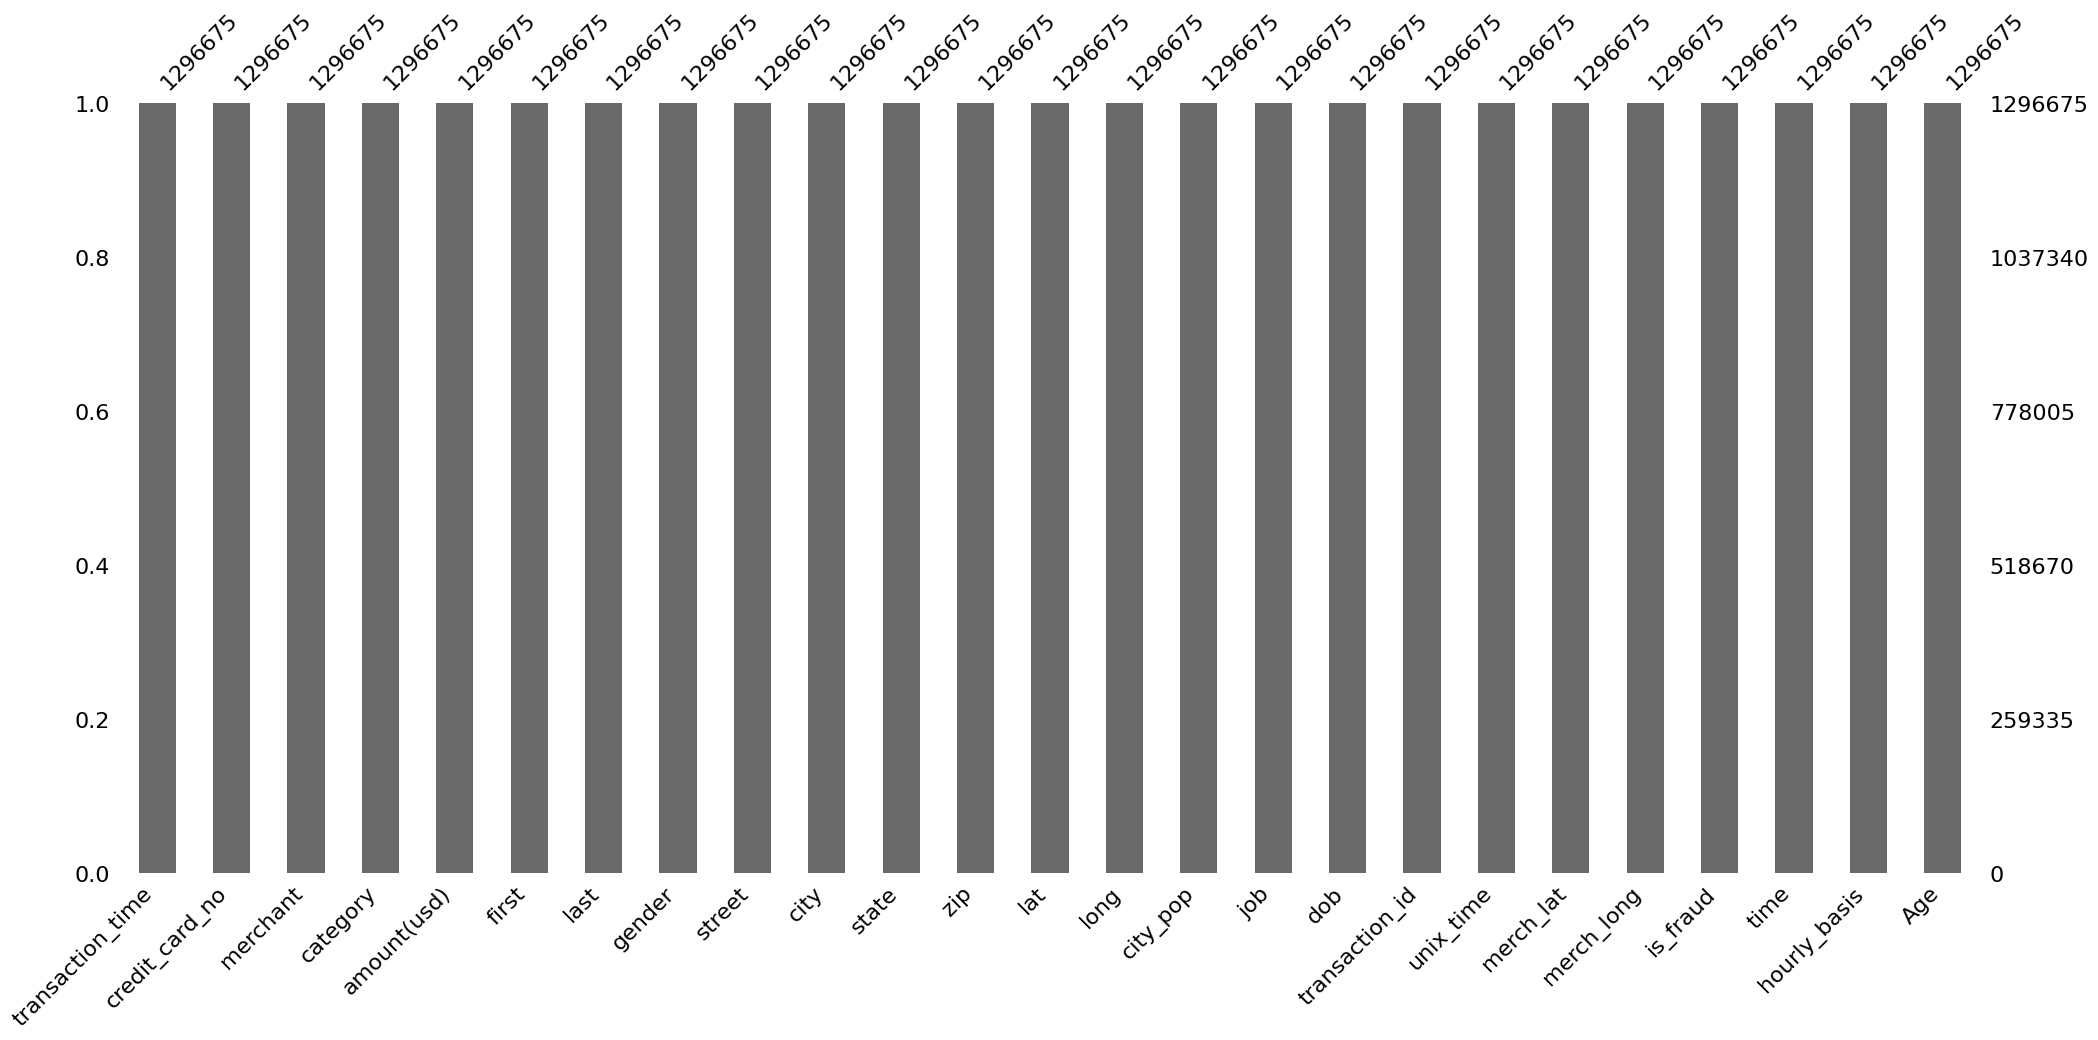

In [16]:
# Lets visualize the missing values
import missingno as msno
msno.bar(df_train)

#### Visualization

array([[<AxesSubplot:title={'center':'transaction_time'}>,
        <AxesSubplot:title={'center':'amount(usd)'}>,
        <AxesSubplot:title={'center':'zip'}>],
       [<AxesSubplot:title={'center':'city_pop'}>,
        <AxesSubplot:title={'center':'unix_time'}>,
        <AxesSubplot:title={'center':'is_fraud'}>],
       [<AxesSubplot:title={'center':'time'}>,
        <AxesSubplot:title={'center':'hourly_basis'}>,
        <AxesSubplot:title={'center':'Age'}>]], dtype=object)

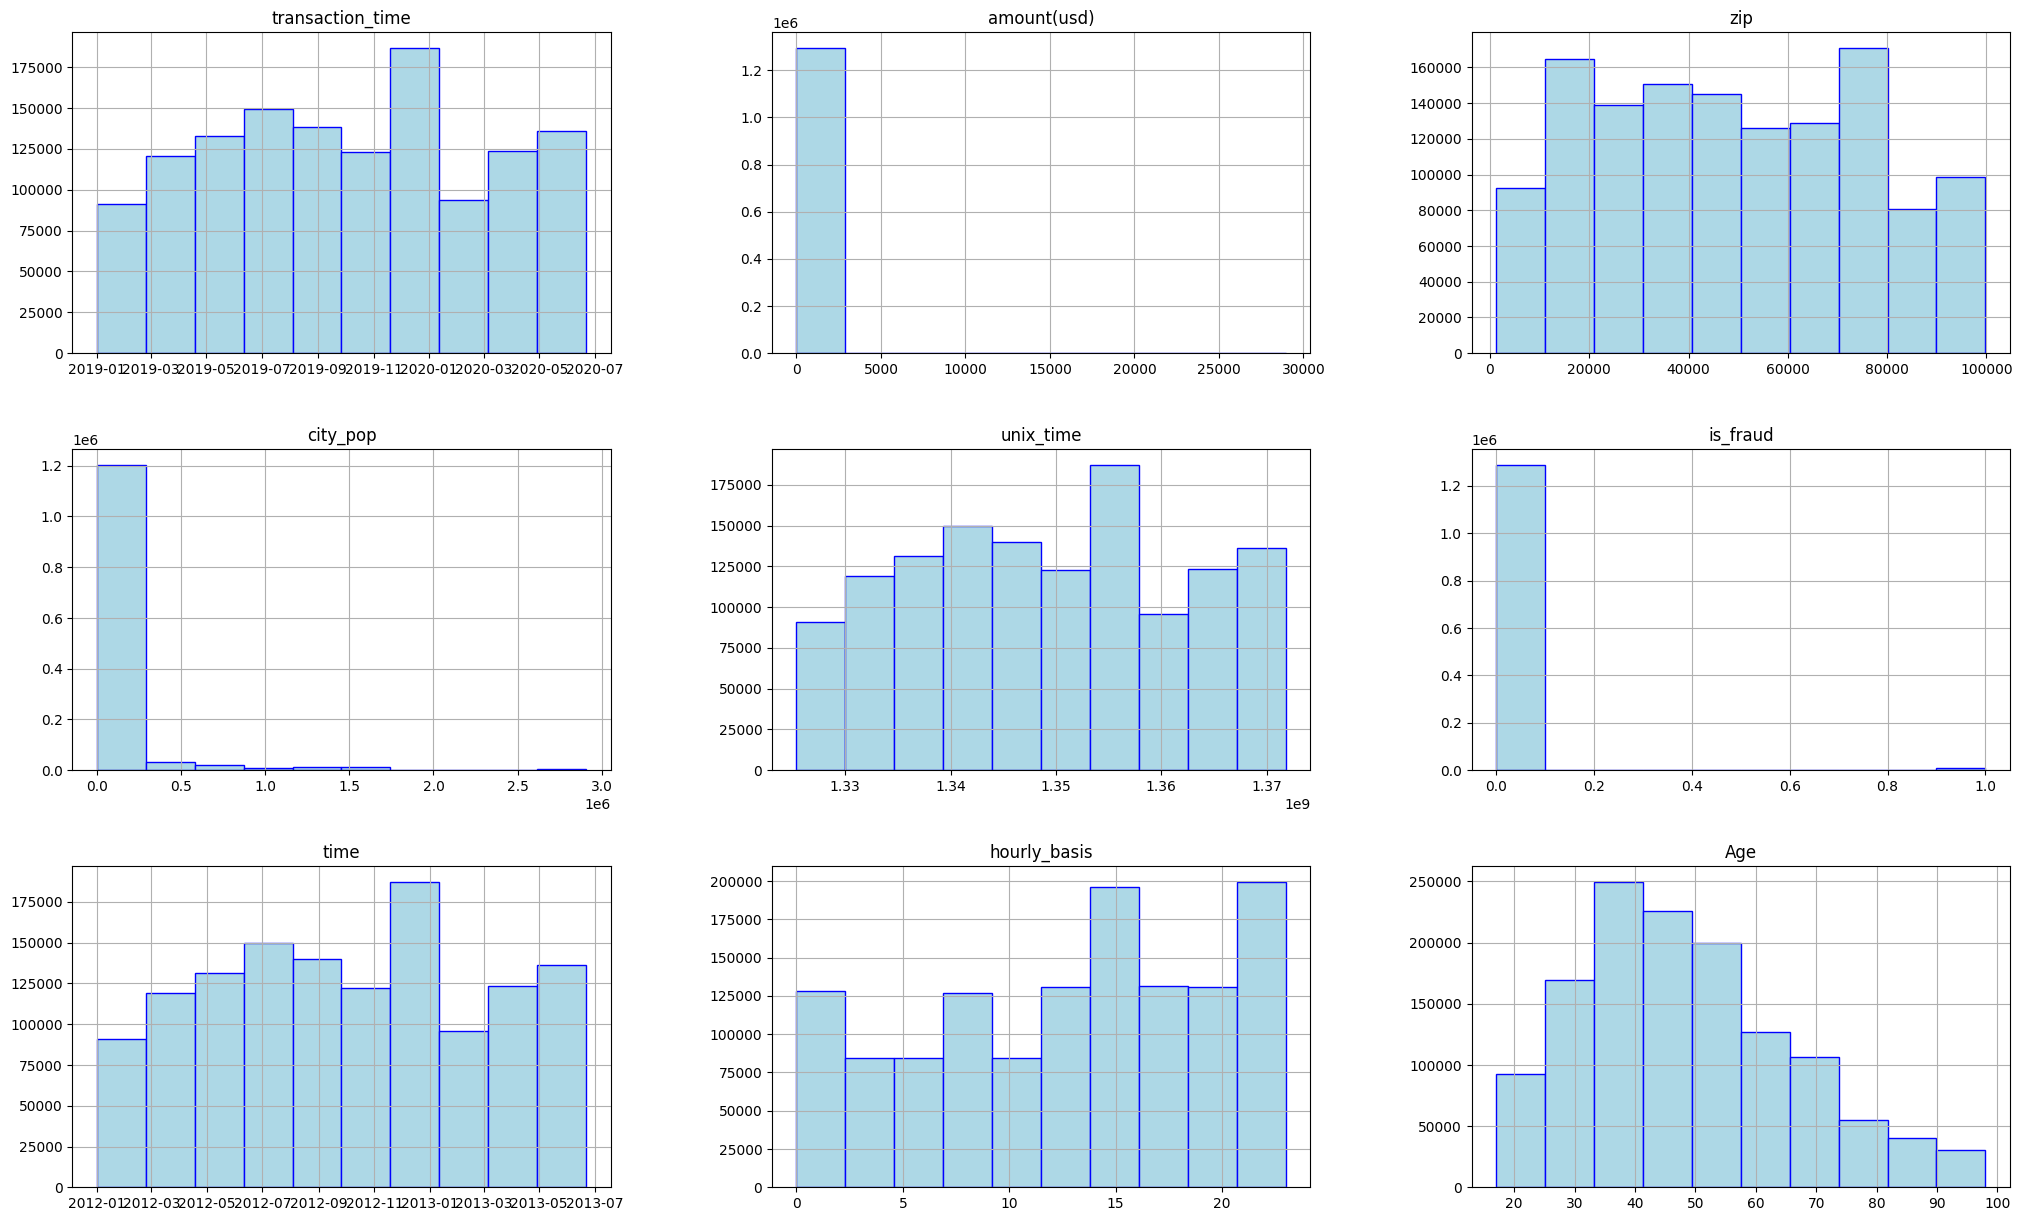

In [17]:
## To visualize data distribution, lets plot some graphs.

df_train.drop(['lat','long','merch_lat','merch_long'], axis=1).hist(figsize=(25,15),color = "lightblue", ec="blue")


<AxesSubplot:xlabel='count', ylabel='gender'>

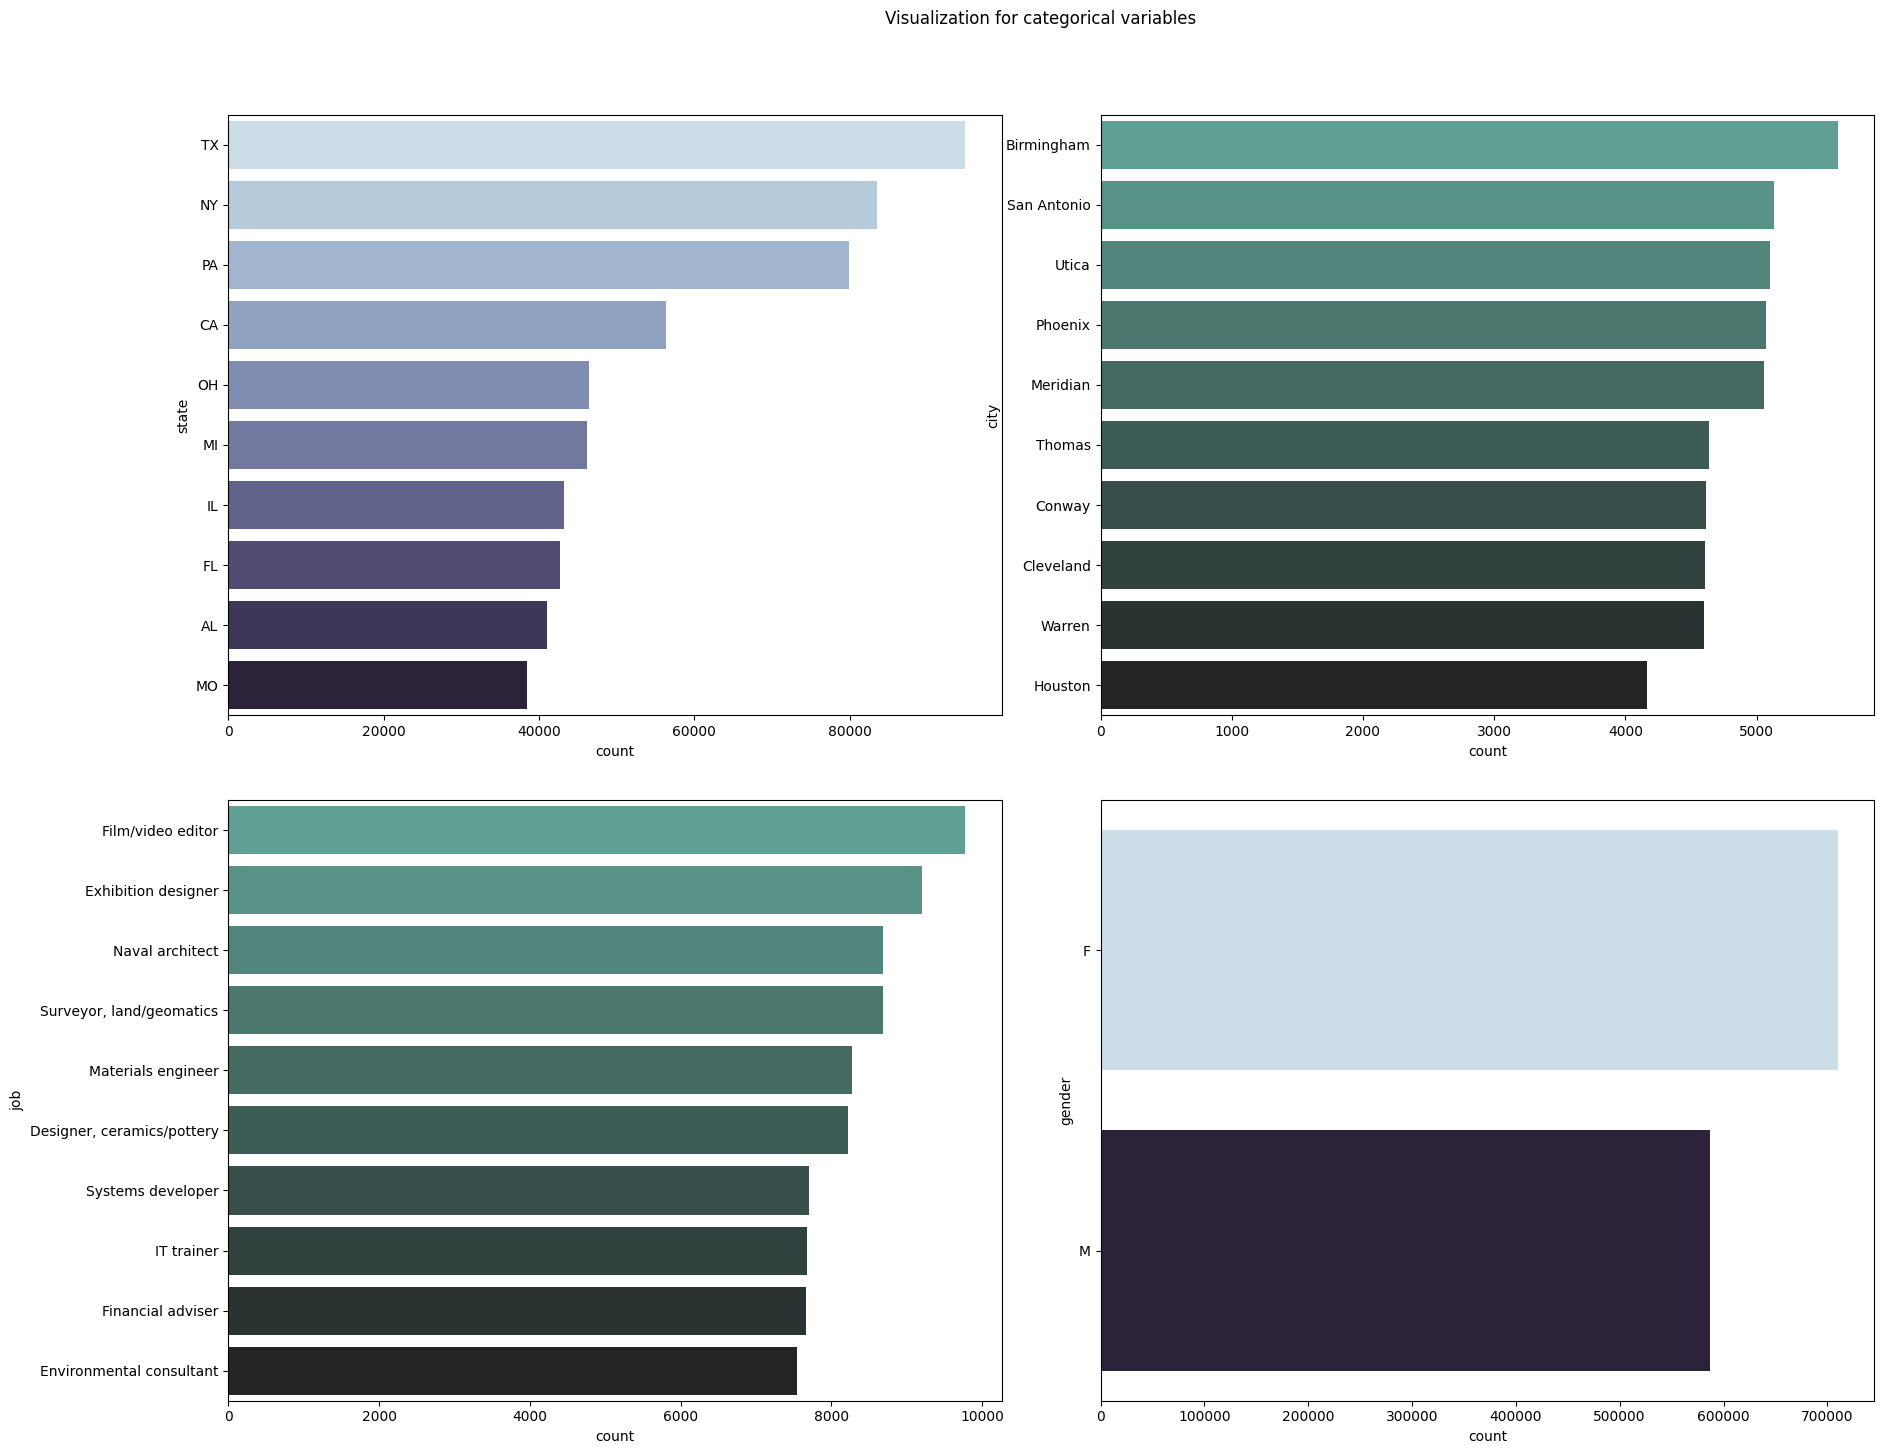

In [18]:
#Lets plot graphs for categorical data type

df_categorical = df_train[['state','city','job','gender']]

fig, axes = plt.subplots(2,2)
fig.suptitle('Visualization for categorical variables')
plt.gcf().set_size_inches(18, 15)
fig.tight_layout(pad=4.0)

sns.countplot(ax=axes[0,0], y = df_categorical['state'], data=df_categorical,order=df_categorical.state.value_counts().iloc[:10].index, palette='ch:s=.25,rot=-.25')
sns.countplot(ax=axes[0,1], y = df_categorical['city'],data=df_categorical, order=df_categorical.city.value_counts().iloc[:10].index, palette="dark:#5A9_r")
sns.countplot(ax=axes[1,0], y = df_categorical['job'],data=df_categorical, order=df_categorical.job.value_counts().iloc[:10].index,palette="dark:#5A9_r")
sns.countplot(ax=axes[1,1], y = df_categorical['gender'],data=df_categorical,palette="ch:s=.25,rot=-.25")


Text(0.5, 1.0, 'Avg transaction in USD on weekly basis')

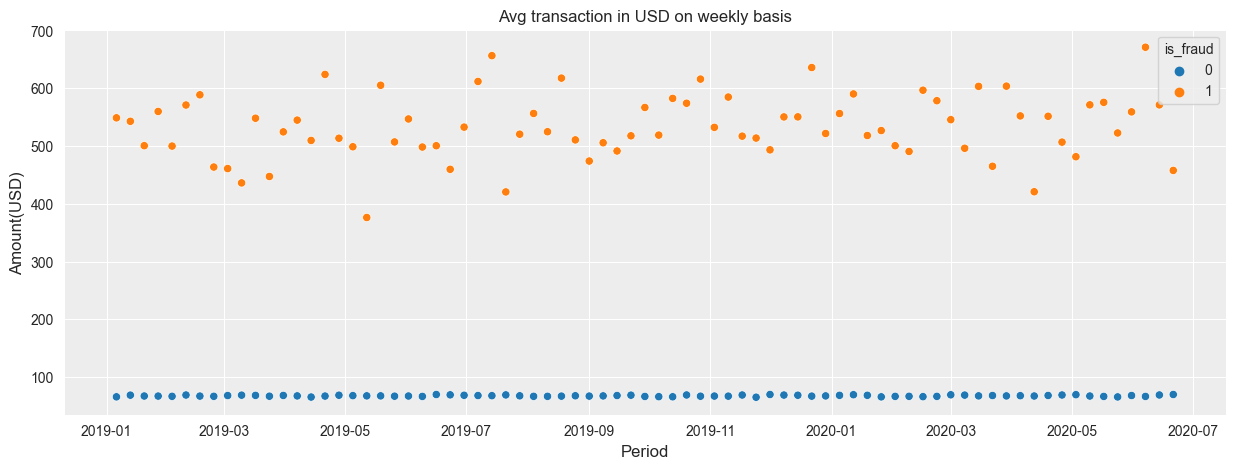

In [19]:
#Amount(USD)overtime

sns.set_style("darkgrid", {"axes.facecolor": "0.93"})
add_features = [pd.Grouper(key="transaction_time", freq="1W"), "is_fraud"]
transaction_df = df_train.groupby(by=add_features).agg({"amount(usd)":'mean',"transaction_id":"count"}).reset_index()

fig, ax = plt.subplots(figsize = ( 15 ,5 ))
sns.scatterplot(ax=ax,data=transaction_df, x='transaction_time', y='amount(usd)', hue='is_fraud')
ax.set_xlabel( "Period" , size = 12 )
ax.set_ylabel( "Amount(USD)" , size = 12 )
ax.set_title( "Avg transaction in USD on weekly basis" , size = 12 )

We can see that the value of fraud transactions are higher compared to non fraud transaction.

Text(0.5, 1.0, 'Amount of fraud/non-fraud transaction')

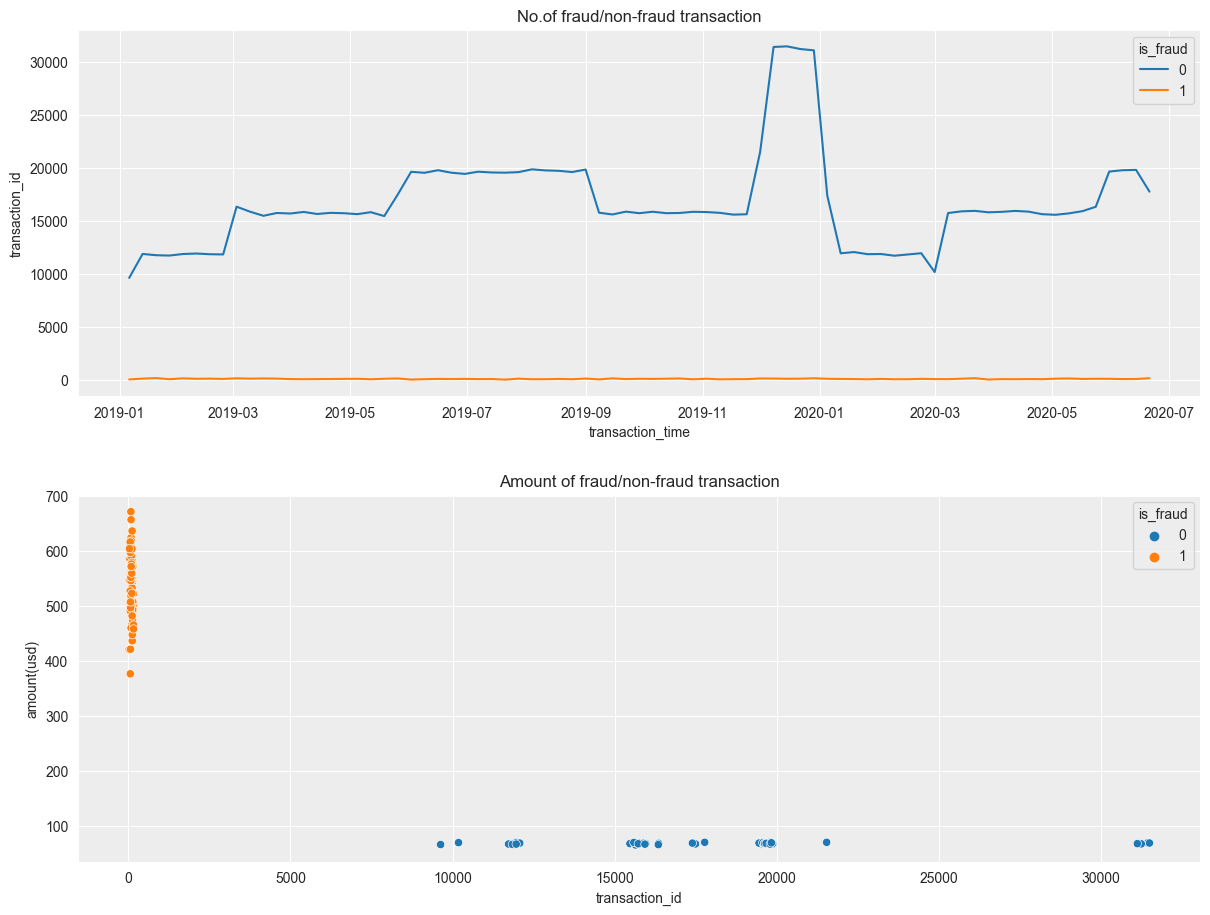

In [20]:
fig, ax = plt.subplots(2,figsize = ( 13 ,10 ))
fig.tight_layout(pad=5.0)
g = sns.lineplot(ax=ax[0],data=transaction_df, x="transaction_time", y="transaction_id",hue='is_fraud')
g.set_title("No.of fraud/non-fraud transaction")
g = sns.scatterplot(ax=ax[1],data=transaction_df, x="transaction_id", y="amount(usd)",hue='is_fraud')
g.set_title("Amount of fraud/non-fraud transaction")

Text(0.5, 1.0, 'Tope 20 Merchants in descending order ')

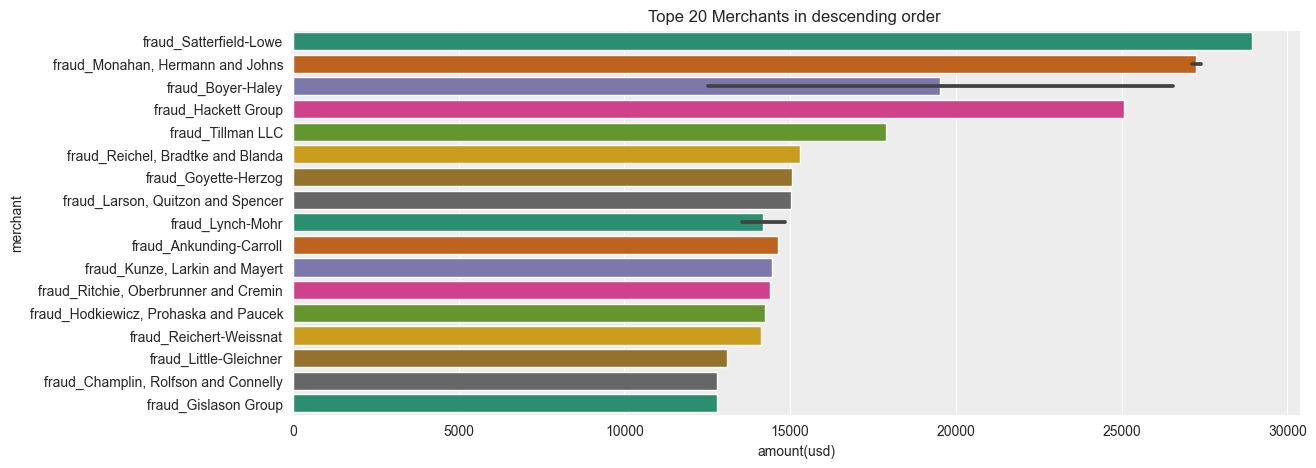

In [21]:
fig, ax = plt.subplots(1,figsize = ( 13 ,5 ))
g = sns.barplot(y='merchant', x="amount(usd)", data=df_train.nlargest(20, 'amount(usd)').sort_values(by='amount(usd)',ascending=False) , palette="Dark2")
g.set_title("Tope 20 Merchants in descending order ")

Text(0.5, 1.0, "Category of products purchased and its' total amount")

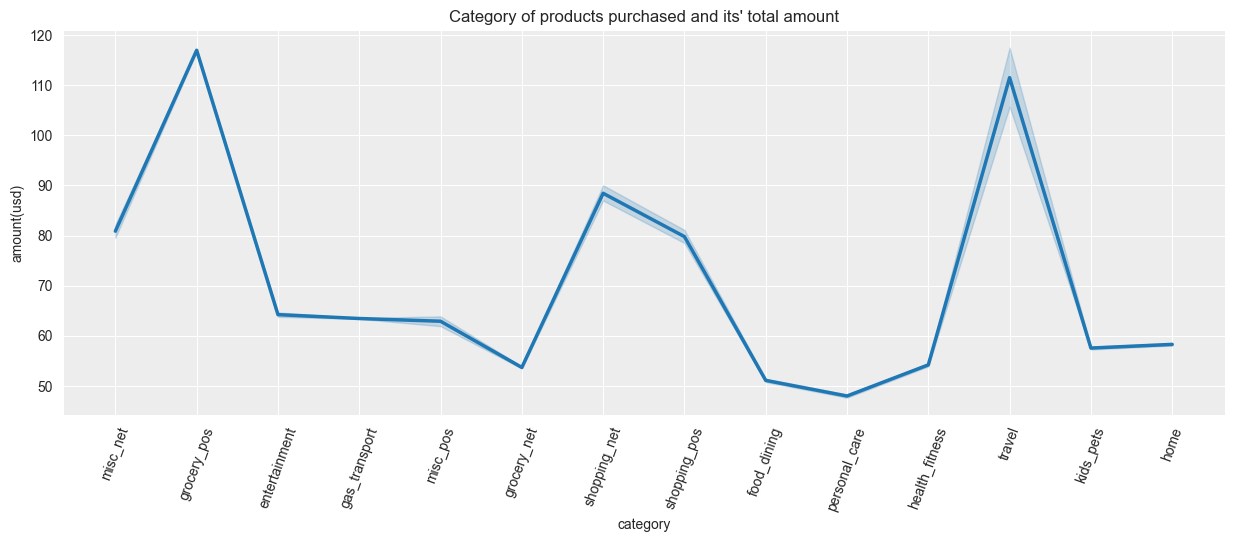

In [22]:
fig, ax = plt.subplots(figsize = ( 15 ,5 ))
sns.lineplot(ax=ax,x='category', y="amount(usd)", data=df_train, linewidth=2.5)
plt.xticks(rotation=70)
ax.set_title("Category of products purchased and its' total amount")

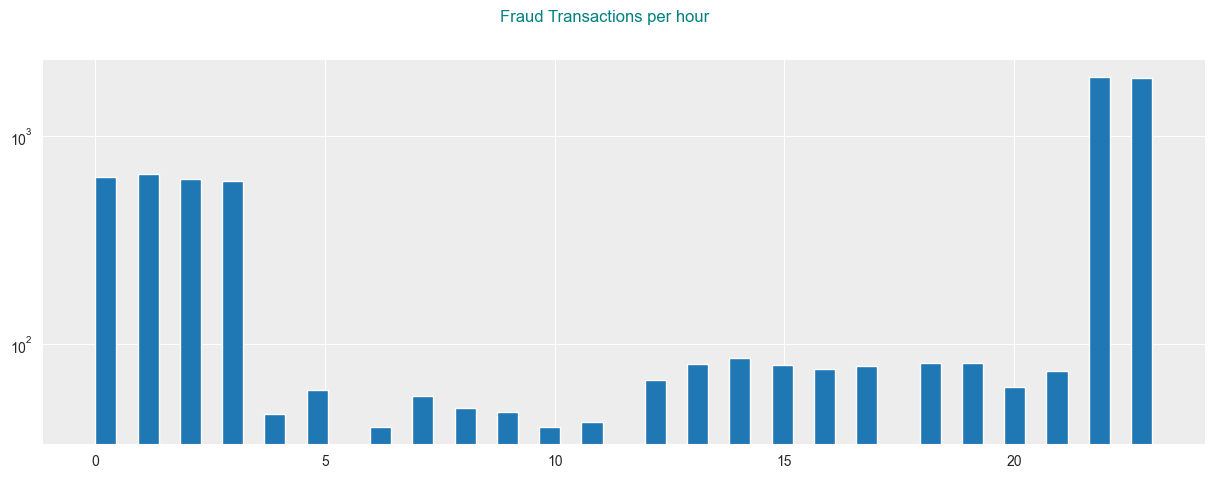

In [43]:
###Pending - hourly graph of something
fig, ax = plt.subplots(figsize = ( 15 ,5 ))
plt.suptitle('Fraud Transactions per hour', fontsize = 12, color= 'teal')
bins =50
plt.hist(df_train[df_train['is_fraud']==1].hourly_basis, bins= bins)
plt.yscale('log')
plt.show()

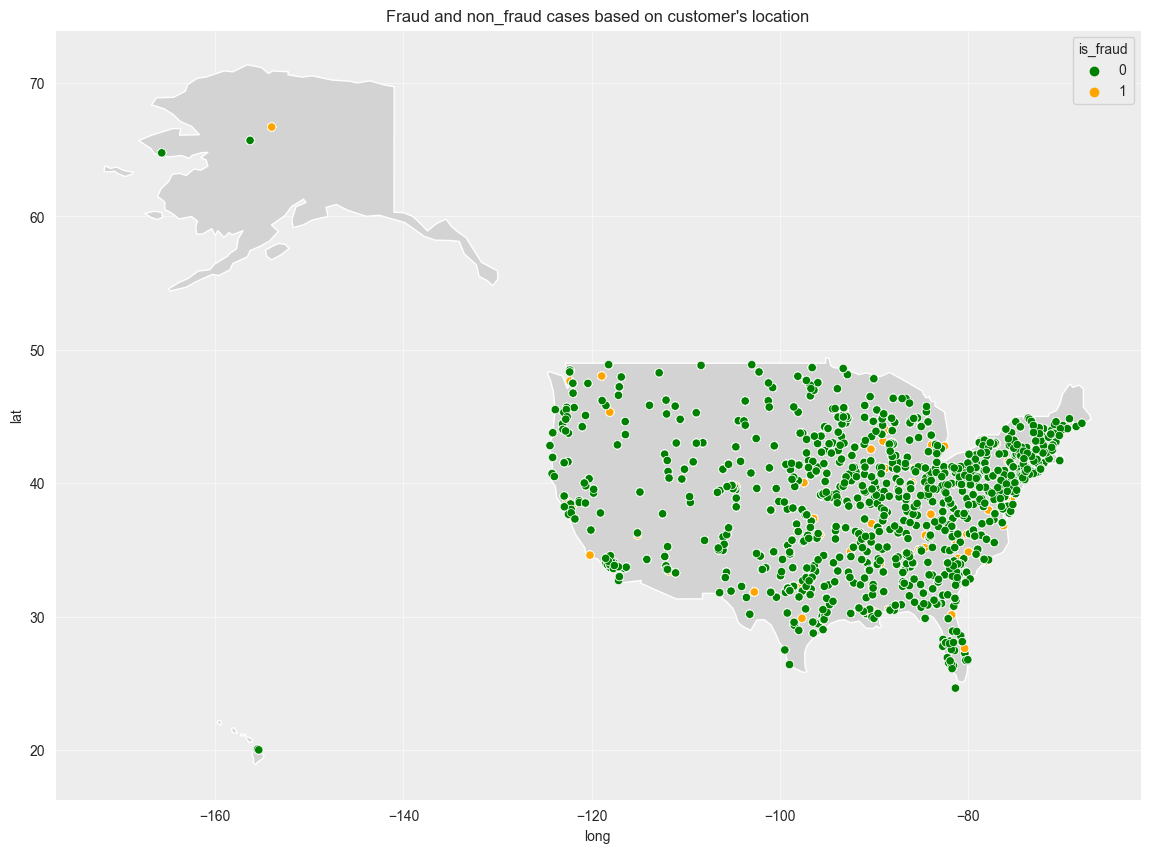

In [24]:
import geopandas as gpd

# initialize an axis
fig, ax = plt.subplots(figsize=(15,10))


# plot map on axis
countries = gpd.read_file(gpd.datasets.get_path("naturalearth_lowres"))
countries[countries["name"] == "United States of America"].plot(color="lightgrey",ax=ax)

# plot points
g = sns.scatterplot(data= df_train, x="long", y="lat",hue="is_fraud", palette=['green','orange'],ax=ax, legend=True)
g.set_title("Fraud and non_fraud cases based on customer's location")


# add grid
ax.grid(visible=True, alpha=0.5)

plt.show()

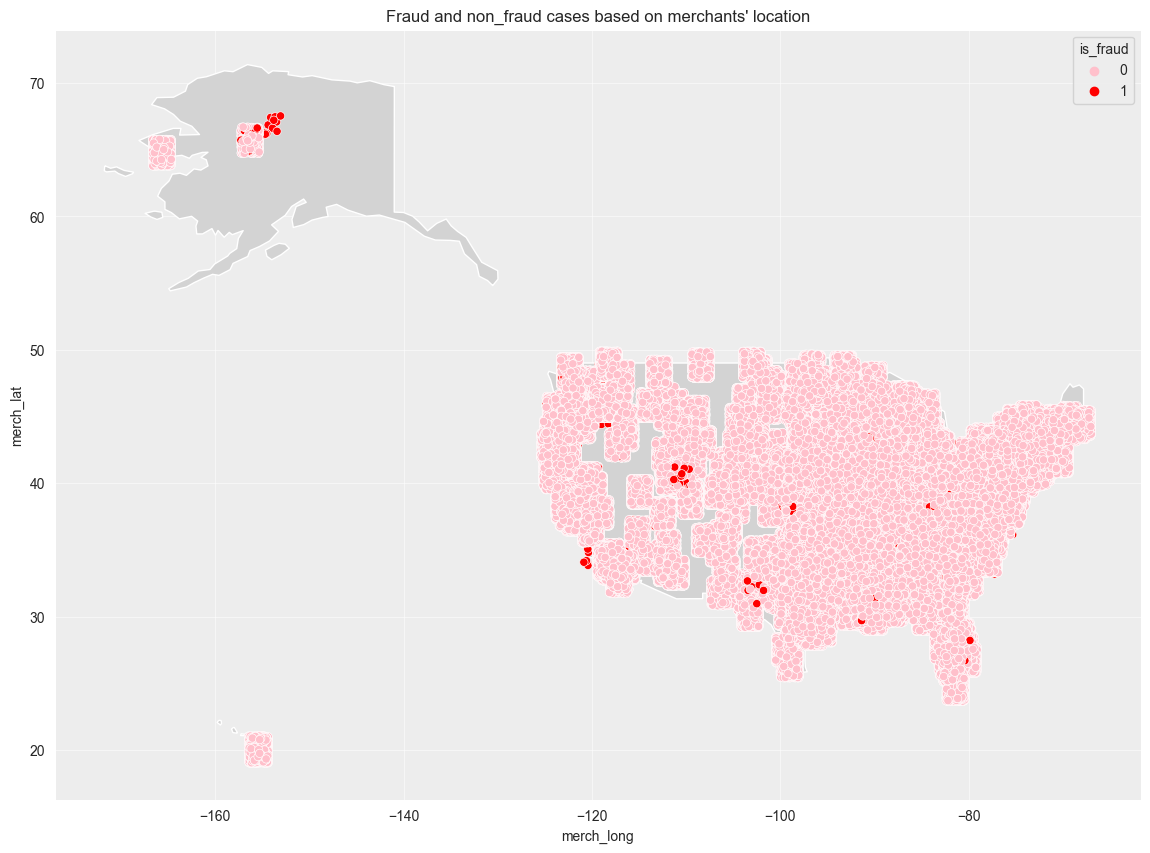

In [25]:
# initialize an axis
fig, ax = plt.subplots(figsize=(15,10))

# plot map on axis
countries = gpd.read_file(gpd.datasets.get_path("naturalearth_lowres"))
countries[countries["name"] == "United States of America"].plot(color="lightgrey",ax=ax)

# plot points
g = sns.scatterplot(data= df_train, x="merch_long", y="merch_lat", palette=['pink','red'], hue='is_fraud',ax=ax, legend=True)
g.set_title("Fraud and non_fraud cases based on merchants' location")

# add grid
ax.grid(visible=True, alpha=0.5)

plt.show()

#### Lets check for data imbalance and plan a strategy to handle our 'is_fraud' column.

In [26]:
np.round(df_train['is_fraud'].value_counts()/len(df_train['is_fraud']) *100,2)

0    99.42
1     0.58
Name: is_fraud, dtype: float64

**99.42 % of our label class shows non-fraud cases while only 0.58 % is for fraud. Our data is highly imbalanced. 

It is common to have only a small fraction of transactions fradulent and that is what exactly what our dataset depicts. Imbalance is not the problem but there are a few things to be addressed while handling it.Referring to the article below:
https://towardsdatascience.com/class-imbalance-in-machine-learning-problems-a-practical-guide-4fb81eee0041
1. Choosing the wrong metric (instead of Accuracy metric, we can opt for precision @ fixed recall, recall @ fixed precision or F1-Score which will take into account FNs)
2. Training/serving skew (this happens when the training data set used to train the model is not the same as the data used at inference time. This is an example of manually rebalanced dataset.
3. Data scarcity (if the positive samples aren't large enough, the model can easily memorize these samples and this leads to overfitting.) 

However, we will not rebalance the data  as :
- upsampling minority class will introducs training/skewing skew as the the positive classes are copied, the actual data pattern can be distorted.
- downsampling majority class is assuming all samples are equally important which might not be the case.

So, we will adjust our classification decision threshold.Referring to the article in the below link:
https://towardsdatascience.com/how-to-deal-with-imbalanced-classification-without-re-balancing-the-data-8a3c02353fe3

[Text(0.5, 1.0, 'Data distribution of imbalance class label')]

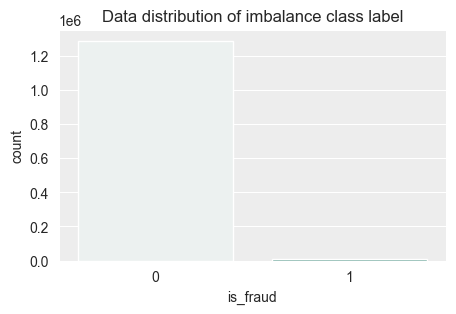

In [27]:
#Visual representation of class imbalance
plt.figure(figsize=(5,3))
sns.countplot(x='is_fraud', data=df_train, palette="light:#5A9").set(title='Data distribution of imbalance class label')

#### Lets fix skewness

In [28]:
df_train.skew()

C:\Users\Nima\AppData\Local\Temp\ipykernel_15652\1035533876.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df_train.skew()


amount(usd)     42.277874
zip              0.079681
lat             -0.186028
long            -1.150108
city_pop         5.593853
unix_time        0.003378
merch_lat       -0.181915
merch_long      -1.146960
is_fraud        13.029122
hourly_basis    -0.282825
Age              0.614079
dtype: float64

**As we can see from above, 'amount(usd)' is skewed much higher compared to other variables. We will fix the skewness before proceeding further**

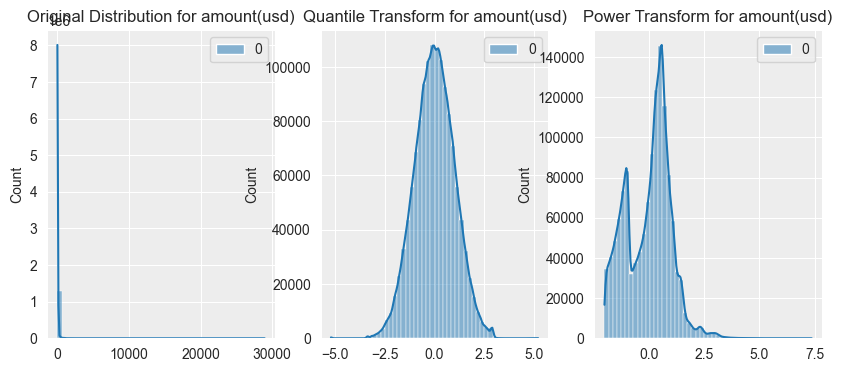

In [29]:
# this method is from the following link:
#https://yashowardhanshinde.medium.com/what-is-skewness-in-data-how-to-fix-skewed-data-in-python-a792e98c0fa6

from sklearn.preprocessing import PowerTransformer, QuantileTransformer
cols1 = ["amount(usd)"]
def test_transformers(columns):
    pt = PowerTransformer()
    qt = QuantileTransformer(n_quantiles=500, output_distribution='normal')
    fig = plt.figure(figsize=(10,4))
    j = 1
    for i in columns:
        array = np.array(df_train[i]).reshape(-1, 1)
        y = pt.fit_transform(array)
        x = qt.fit_transform(array)
        plt.subplot(1,3,j)
        sns.histplot(array, bins = 50, kde = True)
        plt.title(f"Original Distribution for {i}")
        plt.subplot(1,3,j+1)
        sns.histplot(x, bins = 50, kde = True)
        plt.title(f"Quantile Transform for {i}")
        plt.subplot(1,3,j+2)
        sns.histplot(y, bins = 50, kde = True)
        plt.title(f"Power Transform for {i}")
        j += 3
test_transformers(cols1)

*We will apply Quantile transform technique to our 'amount(usd)' column as it shows a better distribution than Power transform technique*

In [30]:
qt = QuantileTransformer(n_quantiles=500, output_distribution='normal')
x = np.array(df_train['amount(usd)']).reshape(-1, 1) 
y = qt.fit_transform(x)
df_train['amount_qt'] = y 

In [31]:
df_train[['amount(usd)','amount_qt']]

,amount(usd),amount_qt
0,4.97,-1.152380
1,107.23,0.996084
2,220.11,1.777715
3,45.00,-0.044428
4,41.96,-0.094928
...,...,...
1296670,15.56,-0.529338
1296671,51.70,0.077335
1296672,105.93,0.981630
1296673,74.90,0.520328


#### Correlation analysis

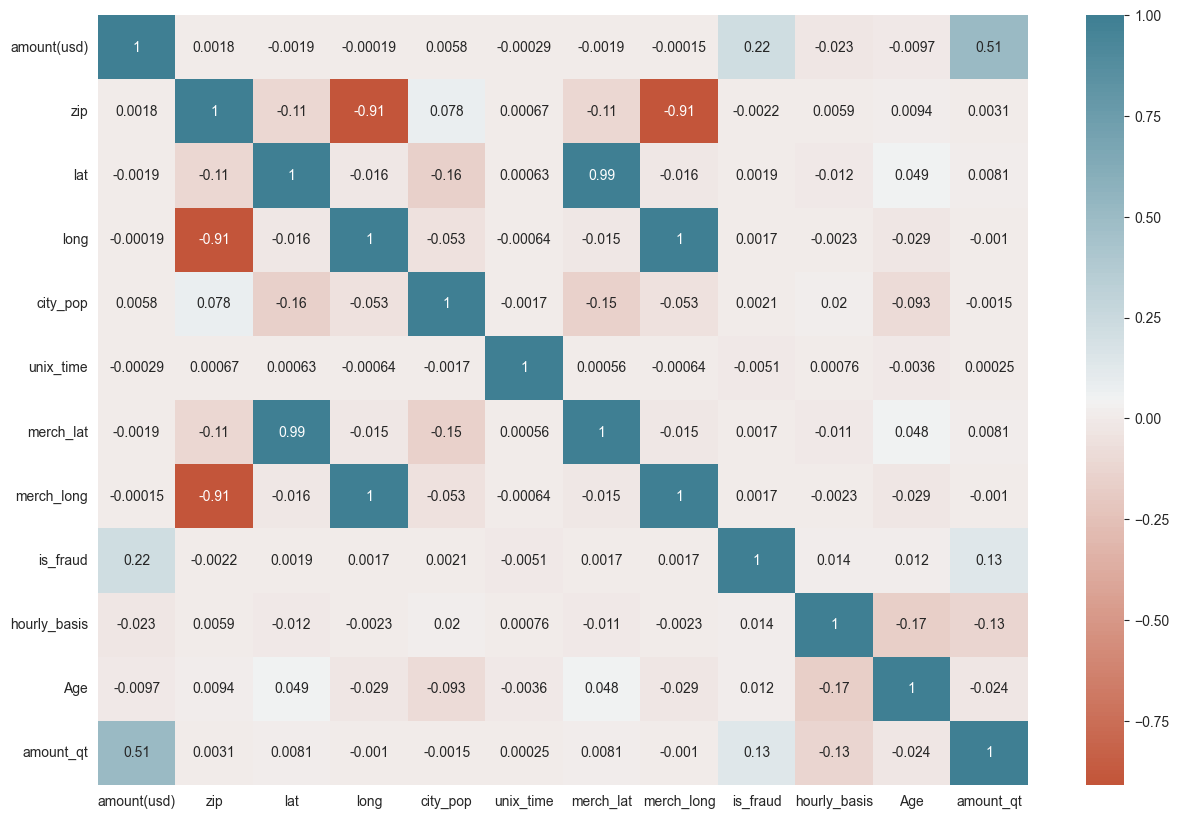

In [32]:
plt.figure(figsize=(15,10))
corre=df_train.corr()
ax=sns.heatmap(corre,annot=True,cmap=sns.diverging_palette(20, 220, n=200))
#bottom, top = ax.get_ylim()
plt.show()

**Degree of correlation:**

- Perfect: If the value is near ± 1, then it said to be a perfect correlation: as one variable increases, the other variable tends to also increase (if positive) or decrease (if negative).
- High degree: If the coefficient value lies between ± 0.50 and ± 1, then it is said to be a strong correlation.
- Moderate degree: If the value lies between ± 0.30 and ± 0.49, then it is said to be a medium correlation.
- Low degree: When the value lies below + .29, then it is said to be a small correlation.
- No correlation: When the value is zero.

In [33]:
print(corre["is_fraud"])

amount(usd)     0.219404
zip            -0.002162
lat             0.001894
long            0.001721
city_pop        0.002136
unix_time      -0.005078
merch_lat       0.001741
merch_long      0.001721
is_fraud        1.000000
hourly_basis    0.013799
Age             0.012329
amount_qt       0.132152
Name: is_fraud, dtype: float64


#### Splitting of training set

In [35]:
df_train.columns.to_list

<bound method IndexOpsMixin.tolist of Index(['transaction_time', 'credit_card_no', 'merchant', 'category',
       'amount(usd)', 'first', 'last', 'gender', 'street', 'city', 'state',
       'zip', 'lat', 'long', 'city_pop', 'job', 'dob', 'transaction_id',
       'unix_time', 'merch_lat', 'merch_long', 'is_fraud', 'time',
       'hourly_basis', 'Age', 'amount_qt'],
      dtype='object')>

In [36]:
X_features = df_train[['hourly_basis', 'Age', 'category', 'amount_qt', 'merchant', 'job','transaction_id']]
y_target = df_train.is_fraud

#Print the shapes of X_features and y_target
X_features.shape,y_target.shape

((1296675, 7), (1296675,))

In [37]:
y_target.to_csv('y_target.csv')

In [38]:
X_features.head()

,hourly_basis,Age,category,amount_qt,merchant,job,transaction_id
0,0,34,misc_net,-1.152380,"fraud_Rippin, Kub and Mann","Psychologist, counselling",0b242abb623afc578575680df30655b9
1,0,44,grocery_pos,0.996084,"fraud_Heller, Gutmann and Zieme",Special educational needs teacher,1f76529f8574734946361c461b024d99
2,0,60,entertainment,1.777715,fraud_Lind-Buckridge,Nature conservation officer,a1a22d70485983eac12b5b88dad1cf95
3,0,55,gas_transport,-0.044428,"fraud_Kutch, Hermiston and Farrell",Patent attorney,6b849c168bdad6f867558c3793159a81
4,0,36,misc_pos,-0.094928,fraud_Keeling-Crist,Dance movement psychotherapist,a41d7549acf90789359a9aa5346dcb46


#### Ordinal encoding

In [39]:
from sklearn.preprocessing import OrdinalEncoder

OE = OrdinalEncoder(dtype=np.int64)
X_features.loc[:,['category','merchant','job','transaction_id']] = OE.fit_transform(X_features.loc[:,['category','merchant','job','transaction_id']])
X_features.loc[:,['category','merchant','job','transaction_id']].head(5)

#X_features.loc[:, ['category','merchant','job','state','gender','transaction_id']] = enc.transform(X_features[['category','merchant','job','state','gender', 'transaction_id']])

C:\Users\Nima\AppData\Local\Temp\ipykernel_25060\3834915619.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_features[['category','merchant','job','transaction_id']] = OE.fit_transform(X_features[['category','merchant','job','transaction_id']])


,category,merchant,job,transaction_id
0,8,514,370,56438
1,4,241,428,159395
2,0,390,307,818703
3,2,360,328,544575
4,9,297,116,831111


#### Feature Elimination using RFR

In [40]:
#### Feature Elimination using RFR

from sklearn.ensemble import RandomForestRegressor
from sklearn.inspection import permutation_importance

#create model
rf = RandomForestRegressor(n_estimators=150)

In [41]:
#fit the model
rf.fit(X_features, y_target)

RandomForestRegressor(n_estimators=150)

(-1.0, 7.0)

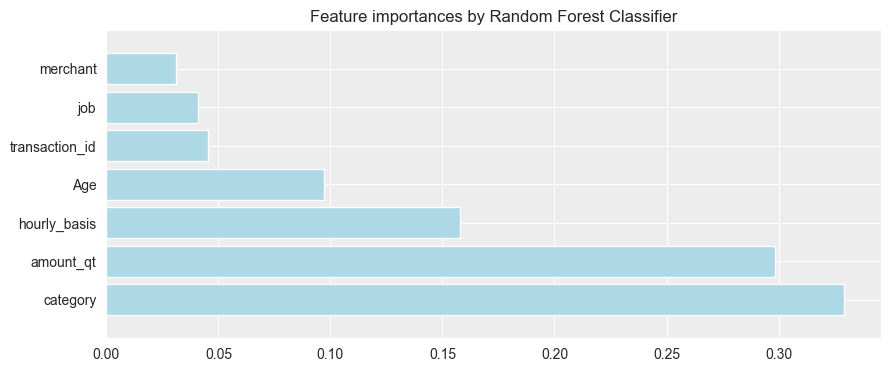

In [42]:
feat_names = X_features.columns
importances = rf.feature_importances_
indices = np.argsort(importances)[::-1][:7]

# Visualize feature importance
plt.subplots(figsize=(10,4))
plt.title("Feature importances by Random Forest Classifier")
plt.barh(range(len(indices)), importances[indices], color="lightblue", align="center")
plt.yticks(range(len(indices)), feat_names[indices], rotation='horizontal')
plt.ylim([-1, len(indices)])

In [43]:
X_features.to_csv('df_cleaned.csv')

#### Standardizing data

In [44]:
# Data Preprocessing
from sklearn.preprocessing import StandardScaler
X_train = StandardScaler().fit_transform(X_features)